In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from scipy import stats
import scipy.stats as ss
from statsmodels.stats.anova import anova_lm

In [2]:
# import the file & print head
weather = pd.read_csv('worcester.csv')
weather.head()

,Index,STATION,NAME,Month,Date,Year,Season,TMAX,TMIN
0,0,USW00094746,"WORCESTER, MA US",1,1,1950,Spring,40,27
1,1,USW00094746,"WORCESTER, MA US",1,2,1950,Spring,37,28
2,2,USW00094746,"WORCESTER, MA US",1,3,1950,Spring,51,35
3,3,USW00094746,"WORCESTER, MA US",1,4,1950,Spring,60,50
4,4,USW00094746,"WORCESTER, MA US",1,5,1950,Spring,58,41


In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25188 entries, 0 to 25187
Data columns (total 9 columns):
Index      25188 non-null int64
STATION    25188 non-null object
NAME       25188 non-null object
Month      25188 non-null int64
Date       25188 non-null int64
Year       25188 non-null int64
Season     25188 non-null object
TMAX       25188 non-null int64
TMIN       25188 non-null int64
dtypes: int64(6), object(3)
memory usage: 1.7+ MB


# Data Formatting

In [4]:
# Assign weeks to the date in each month and year
def Week(df):
    if df['Date'] <= 7 and df['Date'] >= 1:
        return 1
    elif df['Date'] <= 15 and df['Date'] >= 8:
        return 2
    elif df['Date'] <= 23 and df['Date'] >= 16:
        return 3
    else:
        return 4

In [5]:
weather['Week'] = weather.apply(Week, axis=1)

In [6]:
# check the result
weather.head(8)

,Index,STATION,NAME,Month,Date,Year,Season,TMAX,TMIN,Week
0,0,USW00094746,"WORCESTER, MA US",1,1,1950,Spring,40,27,1
1,1,USW00094746,"WORCESTER, MA US",1,2,1950,Spring,37,28,1
2,2,USW00094746,"WORCESTER, MA US",1,3,1950,Spring,51,35,1
3,3,USW00094746,"WORCESTER, MA US",1,4,1950,Spring,60,50,1
4,4,USW00094746,"WORCESTER, MA US",1,5,1950,Spring,58,41,1
5,5,USW00094746,"WORCESTER, MA US",1,6,1950,Spring,42,34,1
6,6,USW00094746,"WORCESTER, MA US",1,7,1950,Spring,34,21,1
7,7,USW00094746,"WORCESTER, MA US",1,8,1950,Spring,22,2,2


In [7]:
# remove the station and name columns
weather = weather.drop(['STATION','NAME'],axis = 1)
weather.head()

,Index,Month,Date,Year,Season,TMAX,TMIN,Week
0,0,1,1,1950,Spring,40,27,1
1,1,1,2,1950,Spring,37,28,1
2,2,1,3,1950,Spring,51,35,1
3,3,1,4,1950,Spring,60,50,1
4,4,1,5,1950,Spring,58,41,1


# Basic Statistics Analysis

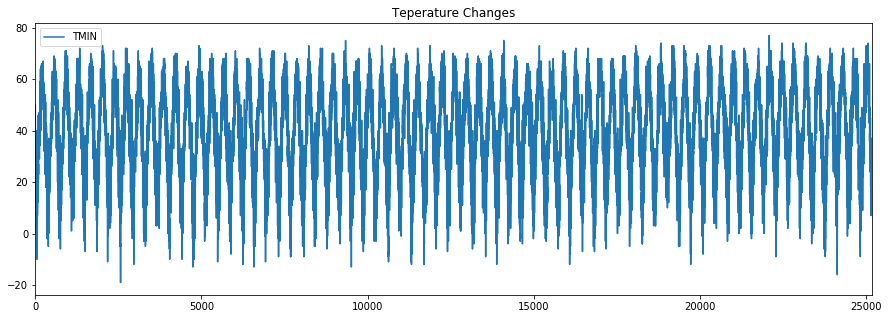

In [8]:
# plot the whole dataset
ax = plt.gca()
weather.plot(y='TMIN',figsize=(15,5), ax = ax)
plt.legend()
plt.title('Teperature Changes')
plt.show()

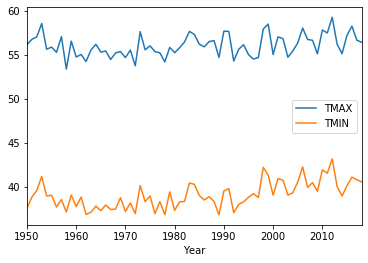

In [15]:
# plot the mean weather of every year
weather.groupby(weather['Year']).mean()['TMAX'].plot()
weather.groupby(weather['Year']).mean()['TMIN'].plot()
plt.legend()
plt.show()

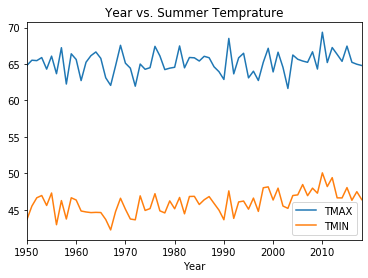

In [10]:
# plot the mean weather of every season in every year

summer_max = weather[weather['Season'] == 'Summer'].groupby('Year').mean()['TMAX']
summer_max.plot()
summer_min = weather[weather['Season'] == 'Summer'].groupby('Year').mean()['TMIN']
summer_min.plot()
plt.legend()
plt.title('Year vs. Summer Temprature')
plt.show()

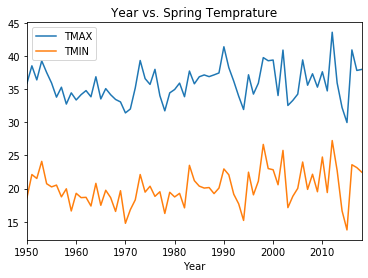

In [11]:
# plot the mean weather of every season in every year

spring_max = weather[weather['Season'] == 'Spring'].groupby('Year').mean()['TMAX']
spring_max.plot()
spring_min = weather[weather['Season'] == 'Spring'].groupby('Year').mean()['TMIN']
spring_min.plot()
plt.legend()
plt.title('Year vs. Spring Temprature')
plt.show()

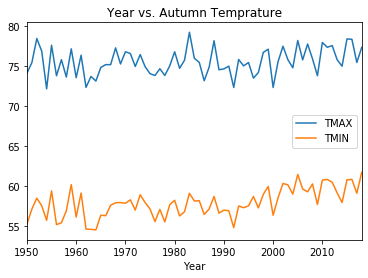

In [12]:
# plot the mean weather of every season in every year

autumn_max = weather[weather['Season'] == 'Autumn'].groupby('Year').mean()['TMAX']
autumn_max.plot()
autumn_min = weather[weather['Season'] == 'Autumn'].groupby('Year').mean()['TMIN']
autumn_min.plot()
plt.legend()
plt.title('Year vs. Autumn Temprature')
plt.show()

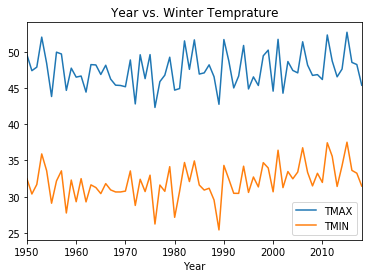

In [13]:
# plot the mean weather of every season in every year

winter_max = weather[weather['Season'] == 'Winter'].groupby('Year').mean()['TMAX']
winter_max.plot()
winter_min = weather[weather['Season'] == 'Winter'].groupby('Year').mean()['TMIN']
winter_min.plot()
plt.legend()
plt.title('Year vs. Winter Temprature')
plt.show()

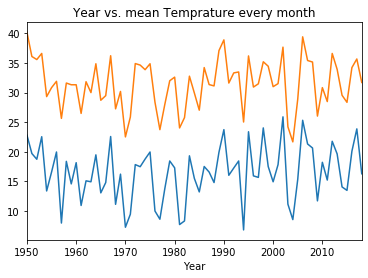

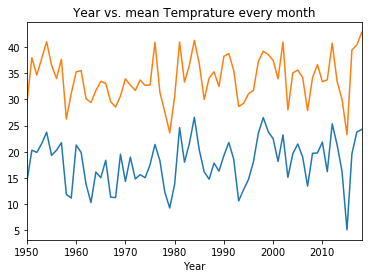

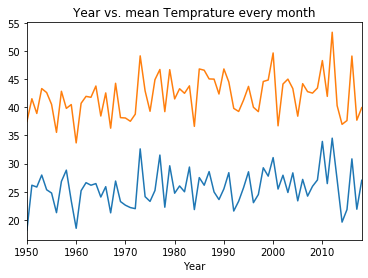

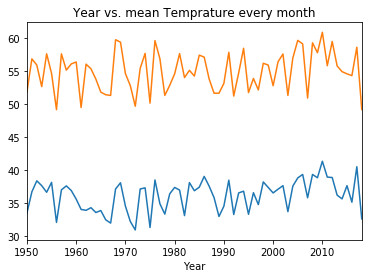

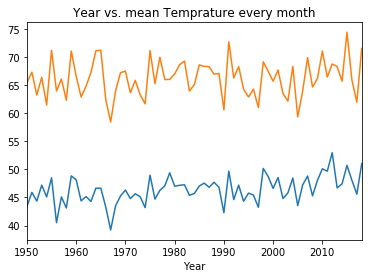

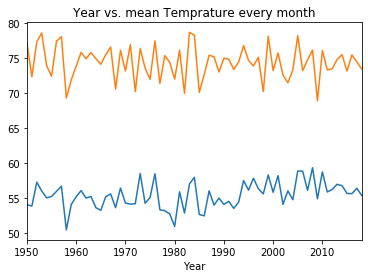

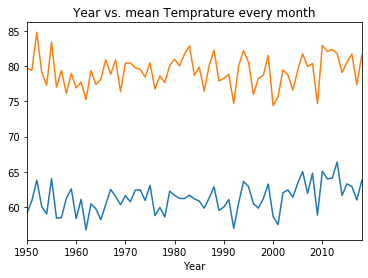

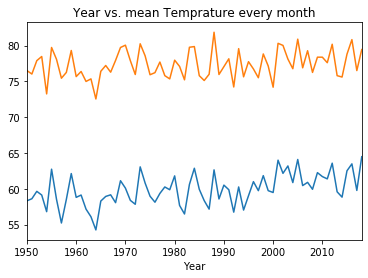

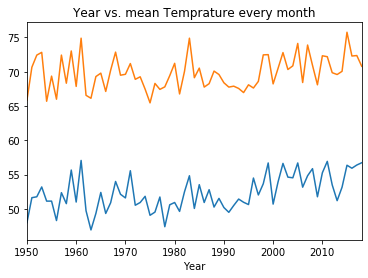

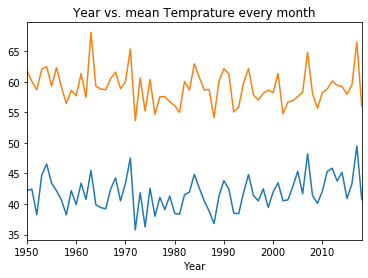

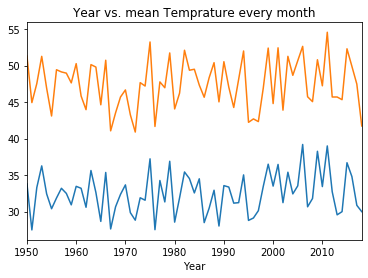

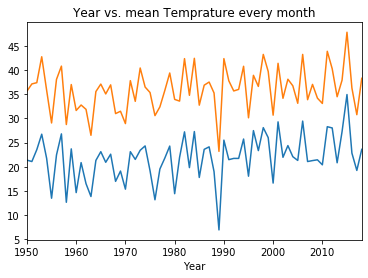

In [14]:
weather.groupby(['Month','Year'])['Year','Month','TMAX'].head()
year = [];
TMAX_mean = [];
for i in range(1,13):
    winter_min = weather[weather['Month'] == i].groupby('Year').mean()['TMIN']
    winter_min.plot()
    winter_max = weather[weather['Month'] == i].groupby('Year').mean()['TMAX']
    winter_max.plot()
    plt.title('Year vs. mean Temprature every month')
    plt.show()